# Example Notebook demonstarting some basic functionality

### Working with legacy StatSTEMInput data

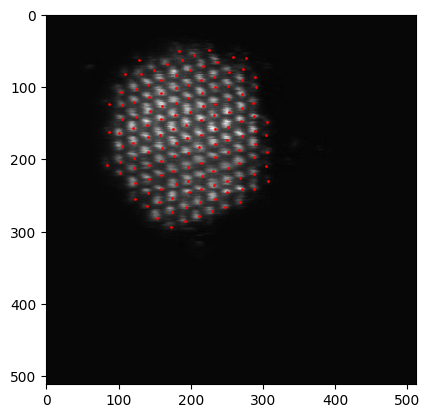

In [1]:
import qem
import matplotlib.pyplot as plt
import numpy as np

legacyStatSTEM = qem.io.read_legacyInputStatSTEM('Example_PtIr.mat')
image = legacyStatSTEM['input']['obs']
dx = legacyStatSTEM['input']['dx']
inputStatSTEM = legacyStatSTEM['input']
outputStatSTEM = legacyStatSTEM['output']

input_coordinates = inputStatSTEM['coordinates']
output_coordinates = outputStatSTEM['coordinates']
input_coordinates[:,1] = input_coordinates[:,1]/dx
input_coordinates[:,0] = input_coordinates[:,0]/dx
from qem.fitting import ImageModelFitting
model=ImageModelFitting(image, pixel_size=dx)
model.import_coordinates(input_coordinates)
model.plot()

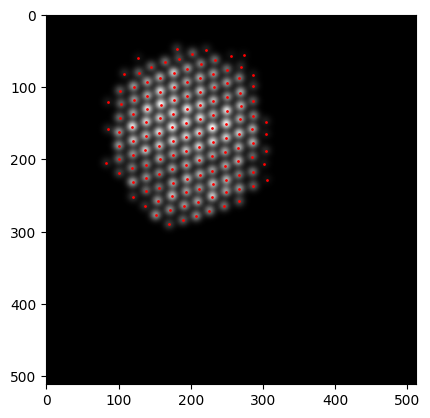

In [2]:
from qem.fitting import ImageModelFitting
model=ImageModelFitting(image, pixel_size=dx)
model.import_coordinates(input_coordinates)
model.fit_background = True
model.model = 'gaussian'
params = model.init_params()
params = model.linear_estimator(params)
model.prediction = model.predict_local(params)
model.fit_global(params, maxiter=10000, tol =1e-3)
model.plot('prediction')

In [ ]:
from qem.fitting import ImageModelFitting


model_gauss=ImageModelFitting(image, pixel_size=dx)
# %matplotlib qt5
# model_gauss.find_peaks()
model_gauss.same_width = True
model_gauss.import_coordinates(input_coordinates)
# model_gauss.fit(model='gaussian',step_size=0.01, max_iter=100, tol=1e-3)
params = model_gauss.init_params()
model_gauss.fit_patch(params, step_size=0.001, maxiter=1000, tol=1e-3,plot=True,buffer_size=5,patch_size =200, mode='random')

In [ ]:
params = model.linear_estimator(params)
model.prediction = model.predict_local(params)

Text(0.5, 1.0, 'Residuals')

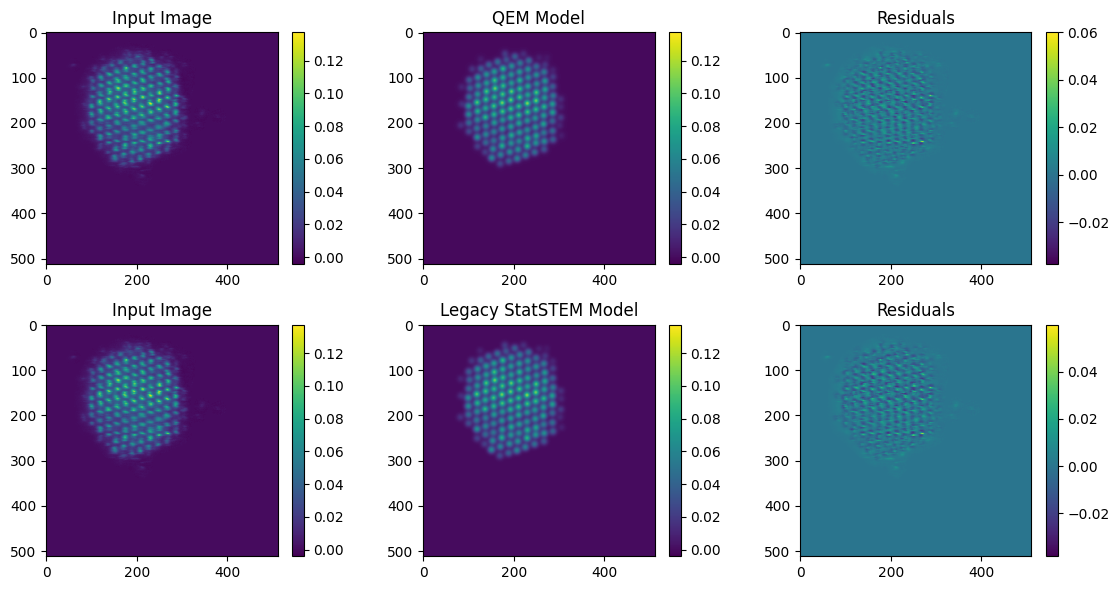

In [3]:
plt.figure(figsize=(12,6))

plt.subplot(2,3,1)
im=plt.imshow(model.image)
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.tight_layout()
plt.title('Input Image')

plt.subplot(2,3,2)
im=plt.imshow(model.prediction)
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.clim(model.image.min(),model.image.max())
plt.tight_layout()
plt.title('QEM Model')

plt.subplot(2,3,3)
diff = model.image - model.prediction
im=plt.imshow(diff)
plt.colorbar(im,fraction=0.046, pad=0.04)
# plt.clim([-1000,1000])
plt.tight_layout()
plt.title('Residuals')

plt.subplot(2,3,4)
im=plt.imshow(image)
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.tight_layout()
plt.title('Input Image')

plt.subplot(2,3,5)
im=plt.imshow(outputStatSTEM['model'])
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.clim(model.image.min(),model.image.max())   
plt.tight_layout()
plt.title('Legacy StatSTEM Model')

plt.subplot(2,3,6)
im=plt.imshow(inputStatSTEM['obs']-outputStatSTEM['model'])
plt.colorbar(im,fraction=0.046, pad=0.04)
# plt.clim([-1000,1000])
plt.tight_layout()
plt.title('Residuals')

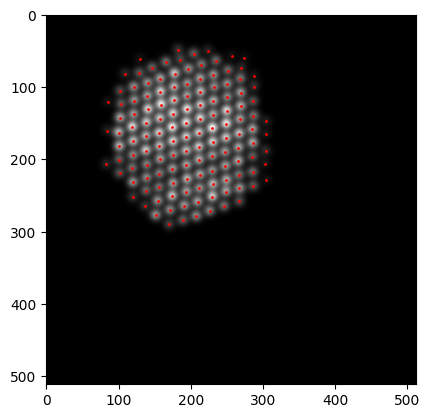

In [ ]:
model_gauss.plot('prediction')

Optimization terminated successfully.
         Current function value: 0.006892
         Iterations: 45
         Function evaluations: 84


Fitting atomic columns: 100%|██████████| 135/135 [00:00<00:00, 264.27it/s]


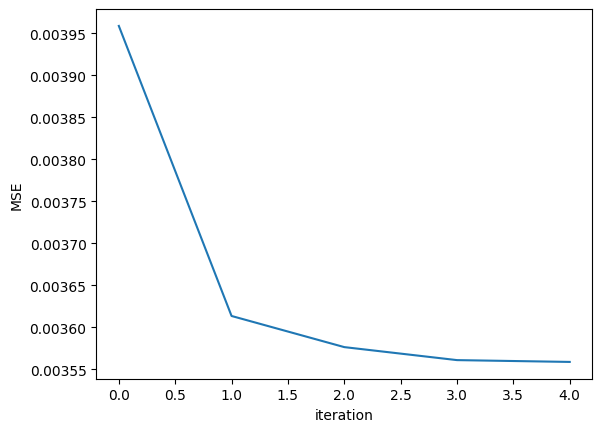

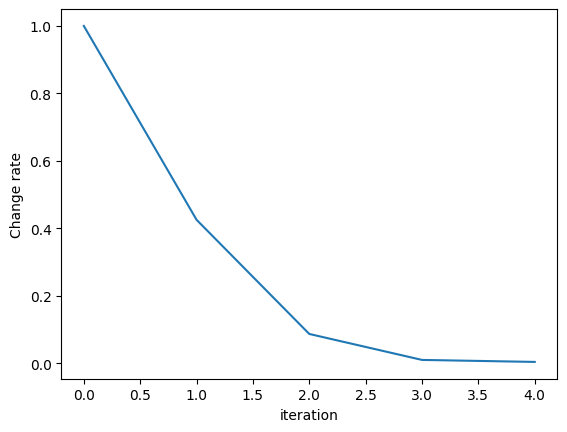

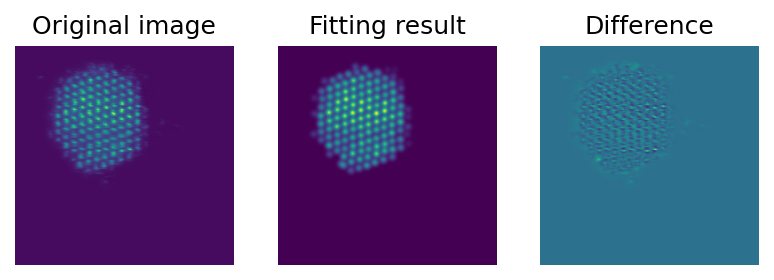

In [ ]:
from pyStatSTEM.fit_numba import ImageModelFitting
model_gauss=ImageModelFitting(image, pixel_size=dx)
# %matplotlib qt5
# model_gauss.find_peaks(threshold_rel=0.10)
model_gauss.same_width = True
model_gauss.fit_background = True
model_gauss.import_coordinates(input_coordinates[:,[1,0]])
model_gauss.fit(view=True,rel_tol = 1e-3)


In [ ]:
model_gauss.plot('original')

In [ ]:
model_gauss.plot('prediction')

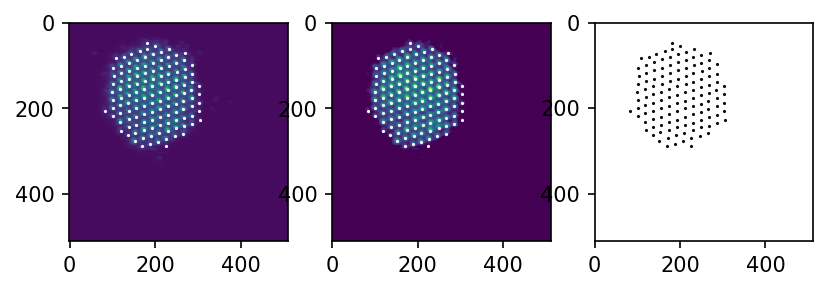

Optimization terminated successfully.
         Current function value: 0.000019
         Iterations: 53
         Function evaluations: 98


Fitting atomic columns: 100%|██████████| 129/129 [00:00<00:00, 278.83it/s]


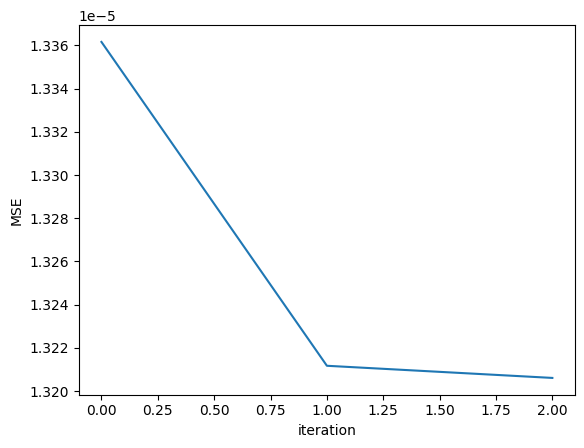

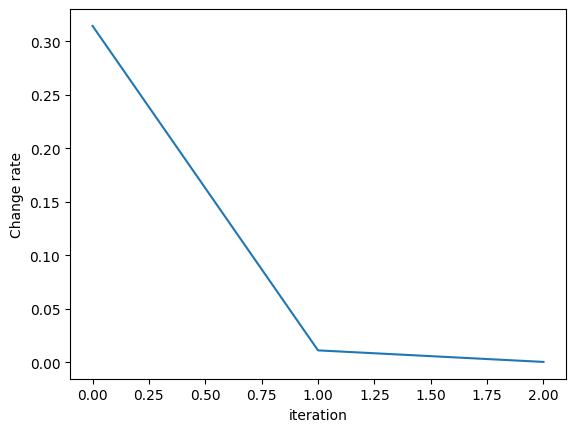

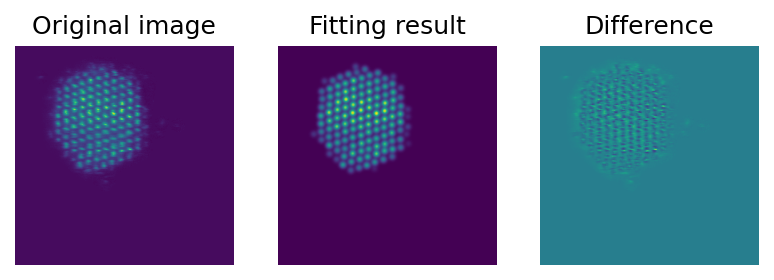

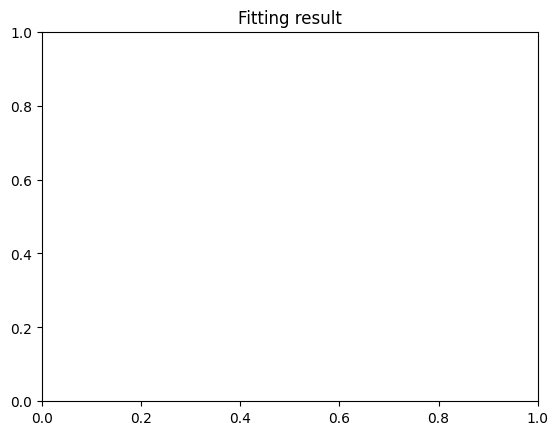

In [ ]:
from pyStatSTEM.classes import ImageProcess

f=ImageProcess(image)
f.find_peak(th_dist=15,th_inten=0.07)
f.import_coordinates(input_coordinates[:,[1,0]].T)
f.fit_gaussian(view=True)

In [ ]:
np.meshgrid(np.arange(0, 10, 1), np.arange(11, 13, 1))

[array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]),
 array([[11, 11, 11, 11, 11, 11, 11, 11, 11, 11],
        [12, 12, 12, 12, 12, 12, 12, 12, 12, 12]])]

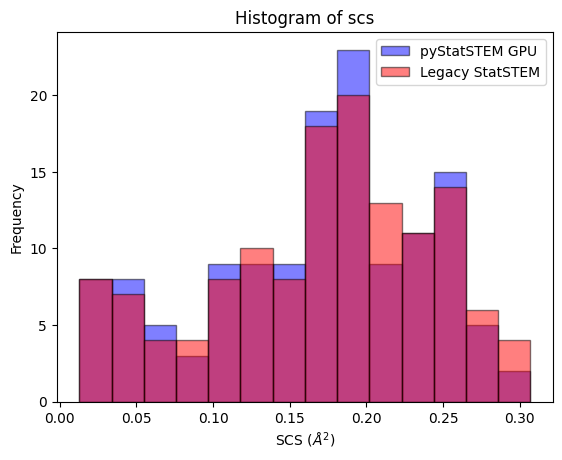

In [ ]:
data1= model.volume
data2= outputStatSTEM['volumes']
combined_data = np.concatenate((data1, data2))
min_bin = combined_data.min()
max_bin = combined_data.max()

# Define the bin edges so that both histograms will use the same bins
bins = np.linspace(min_bin, max_bin, 15)

plt.hist(data1, bins=bins, edgecolor='black',label='pyStatSTEM GPU',color='blue',alpha=0.5)
plt.hist(data2, bins=bins, edgecolor='black',color='red',alpha=0.5, label='Legacy StatSTEM')
plt.title('Histogram of scs')
plt.xlabel(r'SCS ($\AA^2$)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

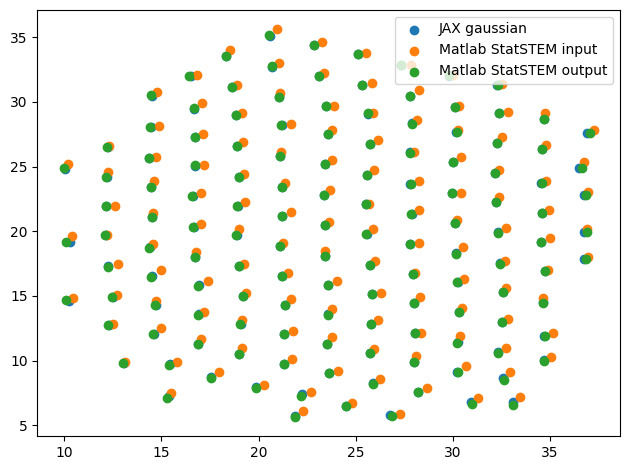

In [ ]:
plt.scatter(model.pos_x,model.pos_y,label='JAX gaussian') 
# plt.scatter(model_voigt.params[0],model_voigt.params[1],label='JAX voigt') 

plt.scatter(input_coordinates[:,0]*dx,input_coordinates[:,1]*dx,label='Matlab StatSTEM input')
plt.scatter(output_coordinates[:,0],output_coordinates[:,1],label='Matlab StatSTEM output')
# plt.scatter(f.coordinate[0][0]*dx,f.coordinate[0][1]*dx,label='pyStatSTEM')
plt.legend()
plt.tight_layout()
# plt.equal_aspect_ratio()

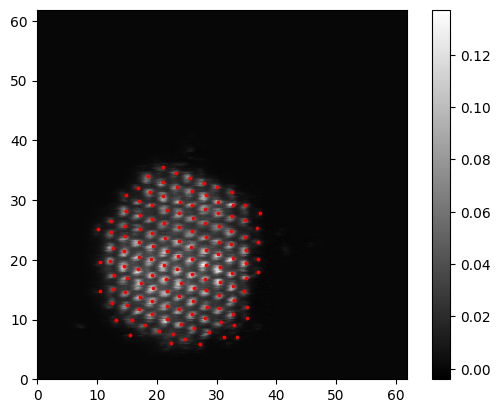

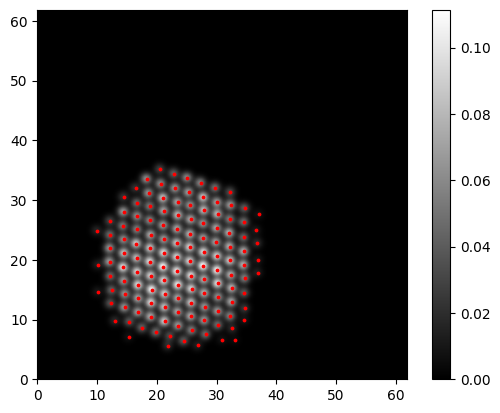

In [ ]:
import pyStatSTEM
import matplotlib.pyplot as plt
import numpy as np

legacyStatSTEM = pyStatSTEM.io.read_legacyInputStatSTEM('Example_PtIr.mat')
inputStatSTEM = legacyStatSTEM['input']
outputStatSTEM = legacyStatSTEM['output']
# atomcountsStatSTEM = legacyStatSTEM['atomcounting'] # not used

fig = pyStatSTEM.utils.plot_image(inputStatSTEM['obs'], inputStatSTEM['Xaxis'], inputStatSTEM['Yaxis'])
plt.scatter(inputStatSTEM['coordinates'][:,0], inputStatSTEM['coordinates'][:,1], c='r', s=3)
plt.show()

fig2 = pyStatSTEM.utils.plot_image(outputStatSTEM['model'], inputStatSTEM['Xaxis'], inputStatSTEM['Yaxis'])
plt.scatter(outputStatSTEM['coordinates'][:,0], outputStatSTEM['coordinates'][:,1], c='r', s=3)
plt.show()

### Read generic image file formats into numpy arrays

In [ ]:
img = pyStatSTEM.io.read_image('det.tif')
plt.imshow(img)
plt.show()

### Reading data from delimited text files

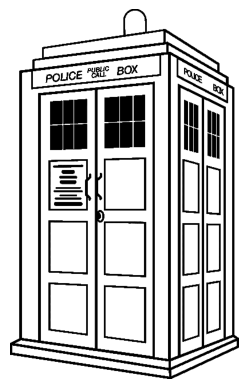

In [ ]:
img = pyStatSTEM.io.read_delimited_text('img.txt')
plt.imshow(-img, cmap='gray')
plt.axis('off')
plt.show()

### Testing preliminary class object instatiations


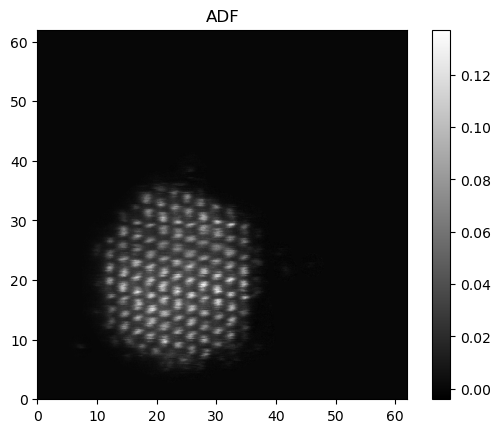

In [ ]:
# Create pyStatSTEM.Image object
im_adf = pyStatSTEM.Image(inputStatSTEM['obs'], 'ADF', inputStatSTEM['dx'])
im_adf.plot()


In [ ]:
from pyStatSTEM.preprocessing import invert_image

# Create new pyStatSTEM.Image object
im_abf = pyStatSTEM.Image(invert_image(inputStatSTEM['obs']),'ABF', inputStatSTEM['dx'])

# Create new pyStatSTEM.Experiment object
ex = pyStatSTEM.Experiment([im_adf, im_abf])
ex.plot()

NameError: name 'im_adf' is not defined

In [ ]:
from tests import test_GMM
test_GMM.test_GMM(path_to_data="Example_PtIr.mat",plot=True)

SyntaxError: invalid syntax (2353454415.py, line 1)